In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type','avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]

### 1) Generate the descriptive statistics (what are the observations) (BMI has 201 values missing) 

In [4]:
df.shape

(5110, 11)

In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#Observtion: based on the data that we can see that we have alot of people for our data, we can also see 
#that the average age is 43 of the participant in the data, we can also see that there were some outliers
# for age since the highest was 82 compared to 43. We can also see that the average glucose level was 106 
#and the highest was 271 which is really high. We can also tell that there were some individuals who could
#be considered obese based on their bmi.

### 2. Stroke frequency on different parameters. This is a barplot (E.g # of Males who had a stroke) ( You do not need to do this for BMI or age ) No need to describe the observations for this step. 

In [7]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

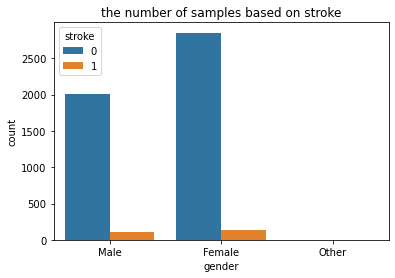

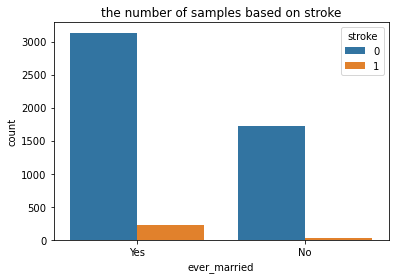

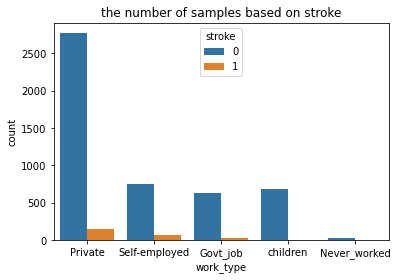

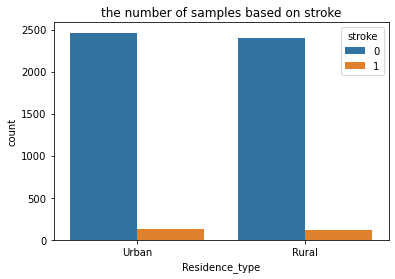

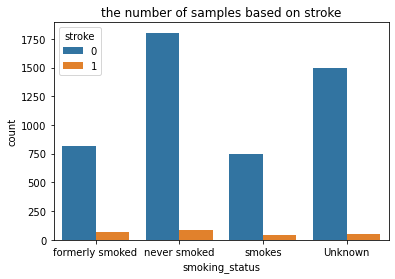

In [8]:
for i in df[0:]:
    if(df[i].dtype == 'object') or (df[i].dtype == 'init64'):
        sns.countplot(data = df, x = i, hue = 'stroke')
        plt.title("the number of samples based on stroke")
        plt.show()

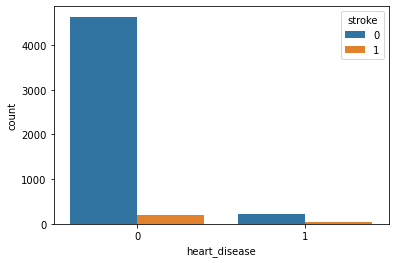

In [9]:
sns.countplot(data = df, x = 'heart_disease', hue = 'stroke')
plt.show()

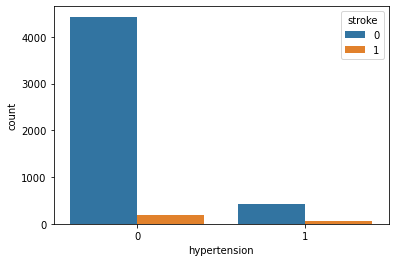

In [10]:
sns.countplot(data = df, x = 'hypertension', hue = 'stroke')
plt.show()

### 3. Create a Distribution plot to understand how age impacts having a stroke. Describe your results. 

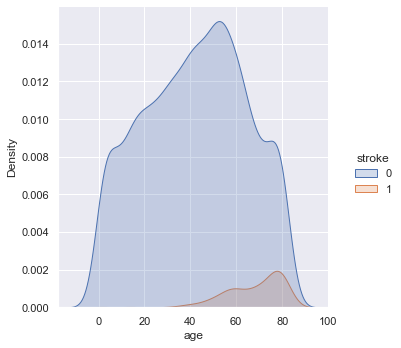

In [50]:
sns.displot(df, x = 'age', hue = "stroke", kind = 'kde', fill = True)

In [1]:
#based on the plot we can see that generally older individuals had a more likely hood of getting a stroke

### 4. Create a violin plot to understand the patients likelihood of getting a stroke. 

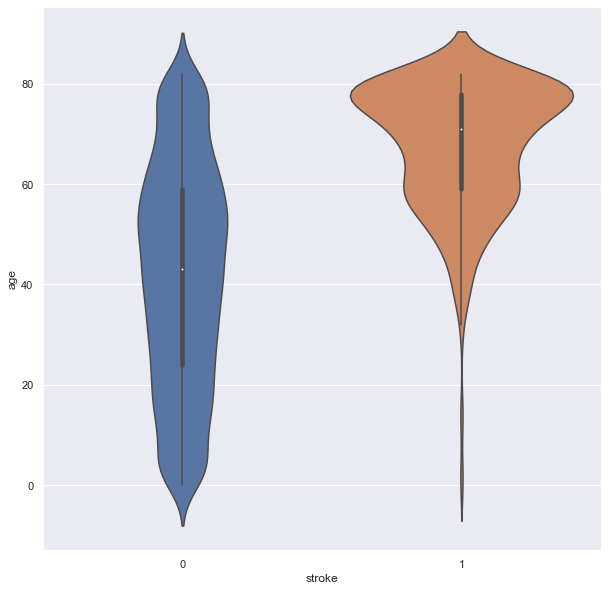

In [12]:
sns.set(rc={'figure.figsize':(10,10)})
seaborn_plot = sns.violinplot(x = 'stroke', y = 'age', data = df)

In [ ]:
#based on the violin plot we can see that the same applies here where older individuals had a more
#likely chance of experiencing a stroke

### 5. Is this dataset imbalanced? The definition of an imbalanced dataset is refers to those types of datasets where the target class has an uneven distribution of observations. (Please write this answer in your code.)  

In [2]:
# Based on the information that we have and the distribution plot and violin plot we can see that the data 
#is balanced my reasoning why is because you can see in both distribution plot and violin plot for age 
#compared to stroke, that the younger indviduals had the least likelyhood of getting a stroke compared to older 
#individuals

### 6. Generate a heat map to understand the correlation among the variables. Describe your results. (Which variables have the strongest correlation) 

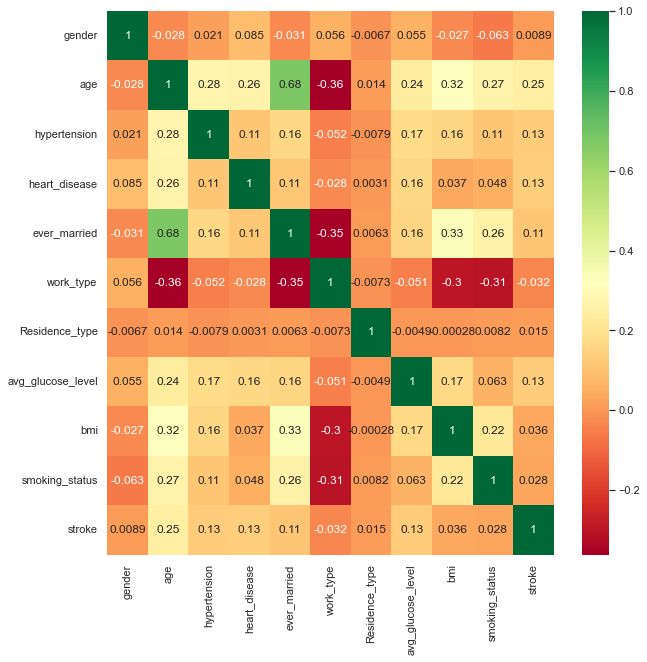

In [51]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [52]:
##look up video on how heatmap show correlation
df[1:].corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028453,0.021074,0.084630,-0.031179,0.056466,-0.006968,0.054597,-0.027192,-0.062508,0.007918
age,-0.028453,1.000000,0.276498,0.263415,0.679084,-0.361650,0.013980,0.237810,0.324156,0.265303,0.244843
hypertension,0.021074,0.276498,1.000000,0.108763,0.164300,-0.051772,-0.007851,0.174775,0.158375,0.111018,0.128435
heart_disease,0.084630,0.263415,0.108763,1.000000,0.114253,-0.027945,0.002290,0.160030,0.036158,0.048833,0.131772
ever_married,-0.031179,0.679084,0.164300,0.114253,1.000000,-0.352719,0.006122,0.154803,0.334819,0.259714,0.107926
work_type,0.056466,-0.361650,-0.051772,-0.027945,-0.352719,1.000000,-0.007287,-0.050468,-0.299172,-0.305942,-0.032245
Residence_type,-0.006968,0.013980,-0.007851,0.002290,0.006122,-0.007287,1.000000,-0.005471,-0.000470,0.008306,0.014636
avg_glucose_level,0.054597,0.237810,0.174775,0.160030,0.154803,-0.050468,-0.005471,1.000000,0.166479,0.063670,0.129946
bmi,-0.027192,0.324156,0.158375,0.036158,0.334819,-0.299172,-0.000470,0.166479,1.000000,0.219062,0.035312
smoking_status,-0.062508,0.265303,0.111018,0.048833,0.259714,-0.305942,0.008306,0.063670,0.219062,1.000000,0.028482


In [ ]:
#Based on the table and the heatmap we can see that their high correlation between 
#(age, hypertension), (age, heart disease), (age, ave glucose), (age, stroke), (hypertension, age), 
#(heart disease, age), (avgGlucose, age), (BMI, age), (stroke, age), based on the ones that i have 
#listed these are the ones that have highest correlation

### 7. Check for outliers in the BMI column and Average_Glucose Column and remove them.

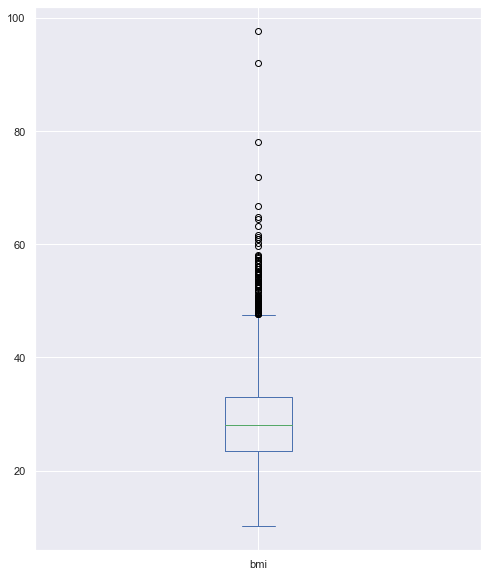

In [16]:
df['bmi'].plot.box(figsize = (8, 10))
plt.show()

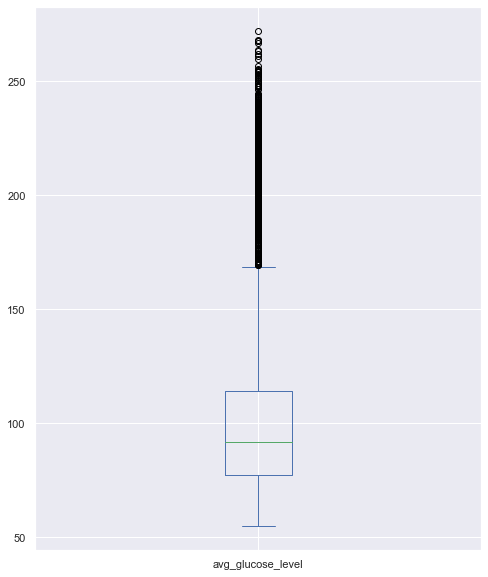

In [17]:
df['avg_glucose_level'].plot.box(figsize = (8, 10))
plt.show()

In [64]:
df['bmi'] = df['bmi'].apply(lambda x: 47 if x > 47 else x)
df['avg_glucose_level'] = df['avg_glucose_level'].apply(lambda x: 170 if x > 170 else x)

C:\Users\Wakab\AppData\Local\Temp\ipykernel_10244\2337326642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'] = df['bmi'].apply(lambda x: 47 if x > 47 else x)
C:\Users\Wakab\AppData\Local\Temp\ipykernel_10244\2337326642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_glucose_level'] = df['avg_glucose_level'].apply(lambda x: 170 if x > 170 else x)


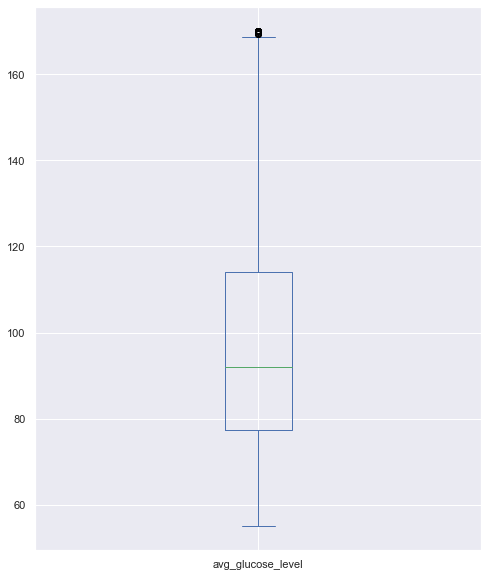

In [65]:
df['avg_glucose_level'].plot.box(figsize = (8, 10))
plt.show()

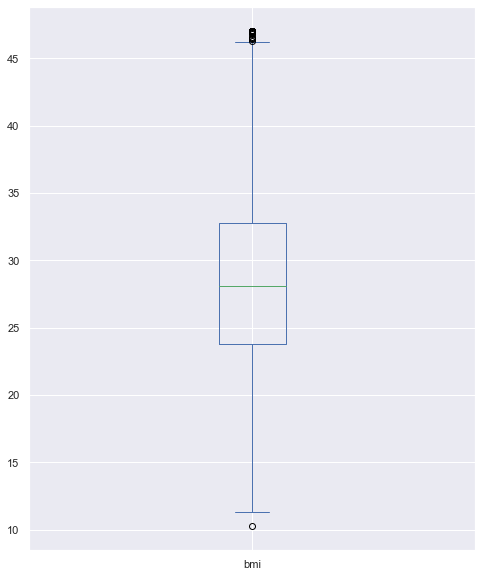

In [66]:
df['bmi'].plot.box(figsize = (8, 10))
plt.show()

### 8. Handle the null values for BMI . ( DO NOT DROP the null values. ) (Use one of the imputation methods we talked about in class)  

In [18]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


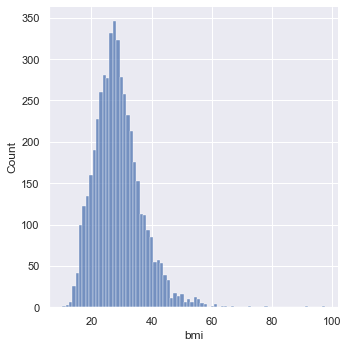

In [19]:
sns.displot(df['bmi'])
plt.show()

In [20]:
#based on the plot for bmi we can see that it is not normally distributed so we will be filling in the missing values using 
#the medium
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

C:\Users\Wakab\AppData\Local\Temp\ipykernel_10244\154773877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'] = df['bmi'].fillna(df['bmi'].median())


In [21]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### 9. Transform the variables that are an object datatype. (Use the Label Encoder library) 

In [22]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [23]:
le = LabelEncoder()

In [24]:
# so we use a for loop that starts at index 0 and we check the dtype of each column and if they are considered as an object
#then we let label encoder transform it which gives us our new table without any string columns
for i in df.columns[0:]:
    if(df[i].dtype == 'object'):
        df[i] = le.fit_transform(df[i])

C:\Users\Wakab\AppData\Local\Temp\ipykernel_10244\625671871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])


In [25]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0
